# 0.0. Imports

In [2]:
import numpy  as np
import pandas as pd
import boruta as bt
import scikitplot as skplt
import pickle

from IPython.core.display  import HTML
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn import preprocessing   as pp
from sklearn import linear_model    as lm
from sklearn import model_selection as ms
from sklearn import ensemble        as en
from sklearn import neighbors       as nh

## 0.1. Helper Function

In [2]:
  
def graphic_percentage(ax,total):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}'.format(height/total*100),
                ha="center") 
    show

## 0.2. Loading Dataset

In [3]:
df_raw = pd.read_csv( '../data/raw/train.csv')

In [4]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1.0. Data Description

In [5]:
df1 = df_raw.copy()

In [6]:
# Rename Columns
cols_new = ['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response']

df1.columns = cols_new

## 1.1. Data Dimension

In [7]:
print( f'Number of Rows: {df1.shape[0]}' )
print( f'Number of Columns: {df1.shape[1]}' )

Number of Rows: 381109
Number of Columns: 12


## 1.2. Data Types

In [8]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.3. Check NA

In [9]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.4. Data Descriptive

In [10]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

## 1.5. Numerical Attributes

In [11]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T  
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


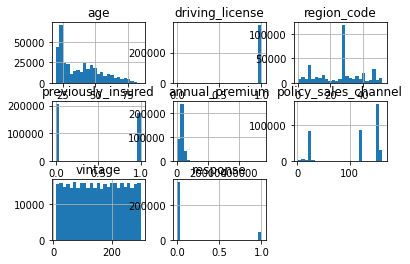

In [12]:
num_attributes.drop(columns = ['id'], inplace = True)
num_attributes.hist(bins=25);

## 1.6. Categorical Attributes

In [13]:
cat_attributes.describe()

,gender,vehicle_age,vehicle_damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


NameError: name 'df1' is not defined

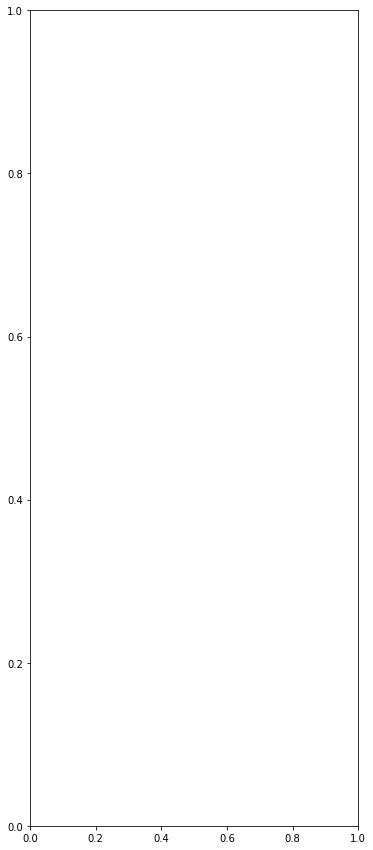

In [3]:
plt.figure(figsize=(20, 15))


plt.subplot(1, 3, 1)
sns.countplot(data=df1, x='gender', hue='response');#, multiple='stack');

plt.subplot(1, 3, 2)
sns.countplot(data=df1, x='vehicle_age', hue='response');#, multiple='stack');

plt.subplot(1, 3, 3)
sns.countplot(data=df1, x='vehicle_damage', hue='response');#, multiple='stack');

# 2.0. Feature Engineering

In [5]:
df2 = df1.copy()

NameError: name 'df1' is not defined

## 2.1 Hypotheses Mindmap

## 2.2. Hypothesis

H1 - Mulheres tem mais interesse em comprar seguro de veículos que homens.

H2 - Clientes com carros novos/seminovos (menor que 2 anos), tem mais interesse em seguro de veículos.

H3 - Clientes sem carteira de motorista não tem interesse algum em seguro de veículos.

H4 - Clientes que ja sofreram algum acidente tem mais interesse em adquirir seguro de veículos.

H5 - Clientes acima de 30 anos são mais interessados em adquirir seguro de veículos.

H6 - Clientes que pagaram entre 30000 e 40000 para serem premium no ano(Annual Premium) tem mais interesse em adquirir seguro de veículos.

H7 - Homens tem mais eventos de dano a veículos, do que mulheres.

## 2.3. Feature Engineering

In [4]:
# Vehicle Damage Number
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x == 'Yes' else 0 )

# Vehicle Age
df2['vehicle_age'] =  df2['vehicle_age'].apply( lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' if x == '1-2 Year' else 'below_1_year' )           

NameError: name 'df2' is not defined

# 3.0. Data Filtering

In [16]:
df3 = df2.copy()

# 4.0. EDA

In [17]:
df4 = df3.copy()

## 4.1. Univariate Analysis

/opt/anaconda/envs/health-insurance/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'show' is not defined

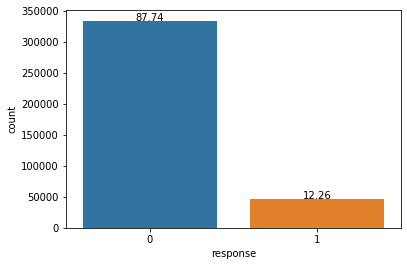

In [18]:
ax=sns.countplot(df4['response'])
total=len(df4['response'])
graphic_percentage(ax,total)

In [ ]:
# 'age'
sns.boxplot( x='response', y='age', data=df4);

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
aux1 = df4.loc[df4['response'] == 0, 'age' ]
sns.histplot( aux1 )

plt.subplot(1, 2, 2)
aux2 = df4.loc[df4['response'] == 1, 'age' ]
sns.histplot( aux2 )

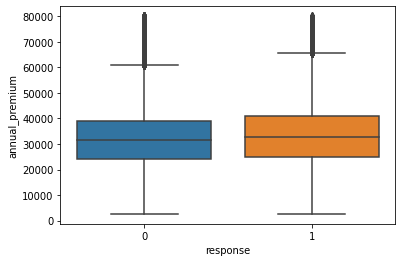

In [19]:
# 'annual_premium'
aux = df4[df4['annual_premium'] < 80000]
sns.boxplot( x='response', y='annual_premium', data=aux);

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

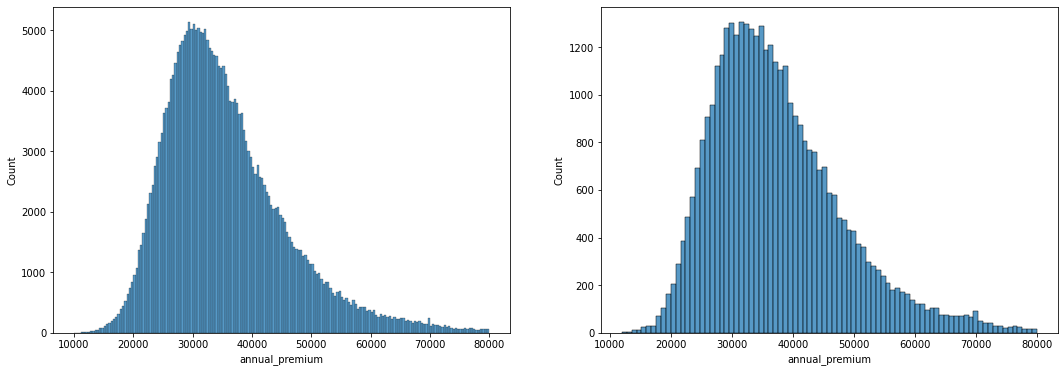

In [20]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
aux = df4[(df4['annual_premium'] > 10000 ) &(df4['annual_premium'] < 80000)]
aux1 = aux.loc[aux['response'] == 0, 'annual_premium' ]
sns.histplot( aux1 )

plt.subplot(1, 2, 2)
aux2 = aux.loc[aux['response'] == 1, 'annual_premium' ]
sns.histplot( aux2 )

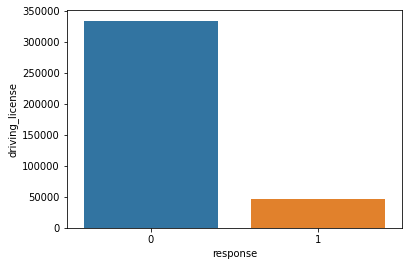

In [21]:
# 'driving_license'
aux = df4[['driving_license', 'response']].groupby( 'response' ).sum().reset_index()
sns.barplot( x='response', y='driving_license', data=aux);

In [22]:
aux = df4[['driving_license', 'response']].groupby( 'response' ).sum().reset_index()
aux['driving_license_%'] = aux['driving_license'] / aux['driving_license'].sum()
aux.head()

,response,driving_license,driving_license_%
0,0,333628,0.877283
1,1,46669,0.122717


In [23]:
# 'region_code'

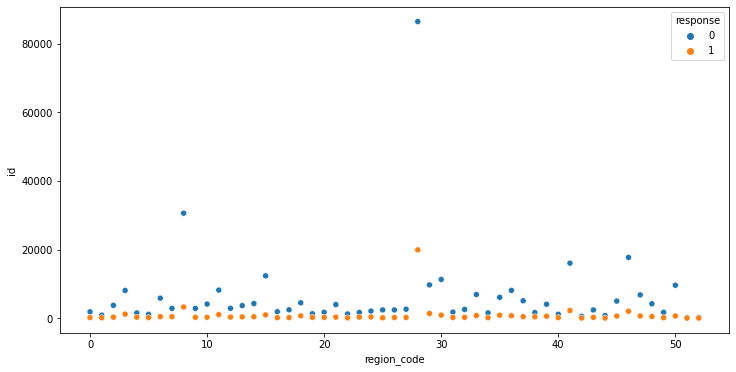

In [24]:
plt.figure(figsize=(12, 6))
aux0 = df4[['id', 'region_code', 'response']].groupby( ['region_code', 'response'] ).count().reset_index()

sns.scatterplot( x='region_code', y='id', hue='response', data=aux0);

In [25]:
# 'driving_license'

In [26]:
# 'previously_insured'
pd.crosstab(df4['previously_insured'], df4['response']).apply( lambda x: x / x.sum(), axis=1 )

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [27]:
# 'vehicle_age'
df4[['vehicle_age', 'response']].value_counts( normalize=True ).reset_index()

,vehicle_age,response,0
0,between_1_2_year,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_year,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


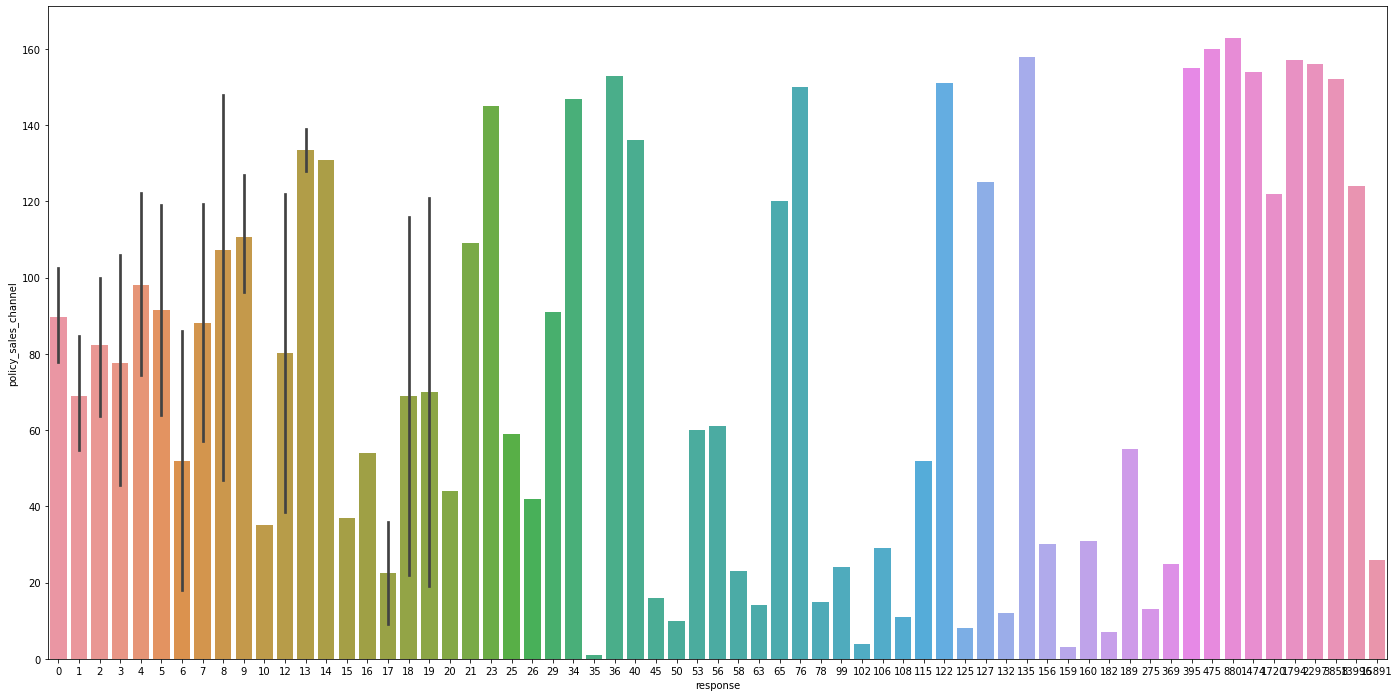

In [28]:
# 'policy_sales_channel'
plt.figure(figsize=(24, 12))
aux = df4[['policy_sales_channel', 'response']].groupby( 'policy_sales_channel').sum().reset_index()
sns.barplot( x='response', y='policy_sales_channel', data=aux);

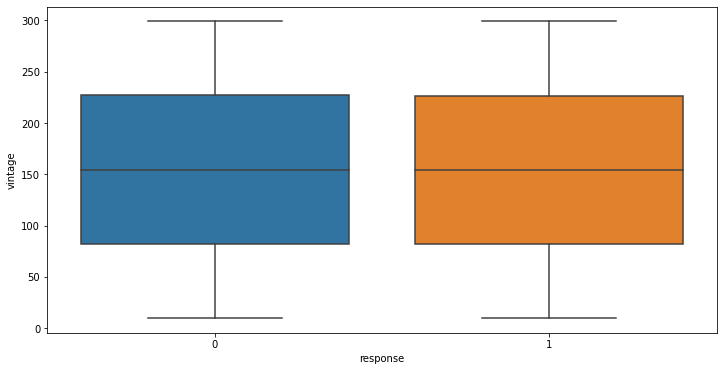

In [29]:
plt.figure( figsize=(18, 6))

plt.subplot(1, 2, 1)
aux1 = df4.loc[df4['response'] == 0, 'vintage' ]
sns.histplot( aux1 )

plt.subplot(1, 2, 2)
aux2 = df4.loc[df4['response'] == 1, 'vintage' ]
sns.histplot( aux2 )

<AxesSubplot:xlabel='vintage', ylabel='Count'>

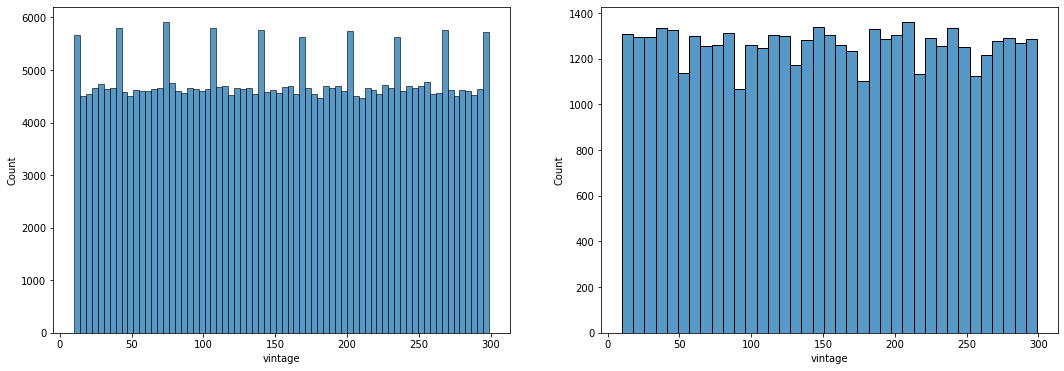

In [30]:
plt.figure( figsize=(18, 6))

plt.subplot(1, 2, 1)
aux1 = df4.loc[df4['response'] == 0, 'vintage' ]
sns.histplot( aux1 )

plt.subplot(1, 2, 2)
aux2 = df4.loc[df4['response'] == 1, 'vintage' ]
sns.histplot( aux2 )

In [6]:
df = pd.pivot_table( index='vintage', columns='response', values='id', data=df4).reset_index()
df.columns = ['vintage', 'no_response', 'yes_response']

NameError: name 'df4' is not defined

<Figure size 1296x432 with 0 Axes>

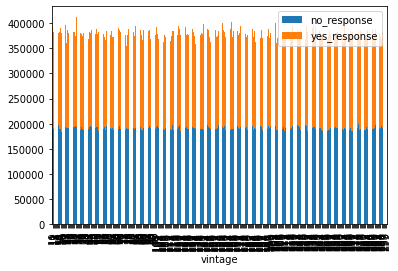

In [32]:
plt.figure( figsize=(18, 6))
df.plot( x='vintage', kind='bar', stacked=True);

# 5.0. Data Preparation

In [33]:
X = df4.drop( 'response', axis=1 )
y = df4['response'].copy() 

x_train, x_validation, y_train, y_validation = ms.train_test_split( X, y, test_size=0.20 )

df5 = pd.concat( [x_train, y_train], axis=1 )

## 5.1. Standardization

In [34]:
ss = pp.StandardScaler()

# anual premium - StandarScaler
df5['annual_premium'] = ss.fit_transform( df5[['annual_premium']].values )
pickle.dump( ss, open( '../src/features/annual_premium_scaler.pkl', 'wb' ) )

## 5.2. Rescaling

In [35]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# age - MinMaxScaler
df5['age'] = mms_age.fit_transform( df5[['age']].values )
pickle.dump( mms_age, open( '../src/features/age_scaler.pkl', 'wb'))

# vintage - MinMaxScaler
df5['vintage'] = mms_vintage.fit_transform( df5[['vintage']].values )
pickle.dump( mms_vintage, open( '../src/features/vintage_scaler.pkl', 'wb'))

## 5.3. Transformation

### 5.3.1. Encoding

In [36]:
# gender - One Hot Encoding / Target Encoding
target_encode_gender = df5.groupby( 'gender' )['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map( target_encode_gender )
pickle.dump( target_encode_gender, open( '../src/features/target_encode_gender_scaler.pkl', 'wb' ) )

# region_code - Target Encoding / Frequency Encoding
target_encode_region_code = df5.groupby( 'region_code' )['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map( target_encode_region_code )
pickle.dump( target_encode_region_code, open( '../src/features/target_encode_region_code_scaler.pkl', 'wb' ) )

# vehicle_age - One Hot Encoding / Frequency Encoding
df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

# policy_sales_channel - Target Encoding / Frequency Encoding
fe_policy_sales_channel = df5.groupby( 'policy_sales_channel' ).size() / len( df5 ) 
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( fe_policy_sales_channel )
pickle.dump( fe_policy_sales_channel, open( '../src/features/fe_policy_sales_channel_scaler.pkl', 'wb' ) )

## 5.4 Validation Preparation

In [37]:
# gender
x_validation.loc[:, 'gender'] =  x_validation.loc[:, 'gender'].map( target_encode_gender )

# age
x_validation.loc[:, 'age'] = mms_age.transform( x_validation[['age']].values )

# region_code
x_validation.loc[:, 'region_code'] = x_validation.loc[:, 'region_code'].map( target_encode_region_code )

# vehicle_age
x_validation = pd.get_dummies( x_validation, prefix='vehicle_age', columns=['vehicle_age'] )

# annual_premium
x_validation.loc[:, 'annual_premium'] = ss.transform( x_validation[['annual_premium']].values )

# policy_sales_channel
x_validation.loc[:, 'policy_sales_channel'] = x_validation['policy_sales_channel'].map( fe_policy_sales_channel )

# vintage
x_validation.loc[:, 'vintage'] = mms_vintage.transform( x_validation[['vintage']].values )

# fillna
x_validation = x_validation.fillna( 0 )

# 6.0. Feature Selection

## 6.2. Features Importancia

In [38]:
# model definition
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

# data preparation
x_train_n = df5.drop( ['id', 'response'], axis=1 )
y_train_n = y_train.values
forest.fit( x_train_n, y_train_n )

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking:
                        feature  importance
0                       vintage    0.273605
0                annual_premium    0.244601
0                           age    0.163740
0                   region_code    0.105233
0                vehicle_damage    0.068556
0          policy_sales_channel    0.060238
0            previously_insured    0.055873
0      vehicle_age_below_1_year    0.014018
0  vehicle_age_between_1_2_year    0.006295
0                        gender    0.005052
0      vehicle_age_over_2_years    0.002302
0               driving_license    0.000488


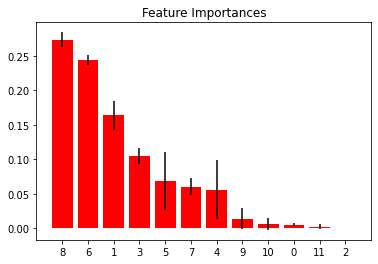

In [39]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print('Feature ranking:')
df = pd.DataFrame()
for i, j in zip( x_train_n, forest.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title('Feature Importances')
plt.bar(range(x_train_n.shape[1]),importances[indices], color='r', yerr=std[indices], align='center')
plt.xticks(range(x_train_n.shape[1]),indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show();

# 7.0. Machine Learning

In [40]:
cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured',
                 'policy_sales_channel']

In [41]:
x_train = df5[ cols_selected ]

x_val = x_validation[ cols_selected ]
y_val = y_validation

## 7.1. KNN Classifier

In [42]:
# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=7 )

# model training
knn_model.fit( x_train, y_train )

# model prediction
yhat_knn = knn_model.predict_proba( x_val )

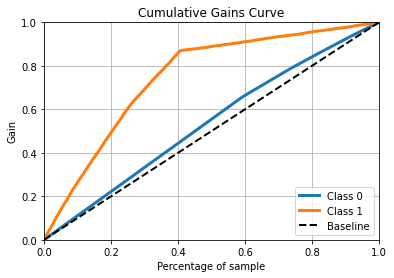

In [43]:
# Accumulative gain
skplt.metrics.plot_cumulative_gain( y_val,yhat_knn );

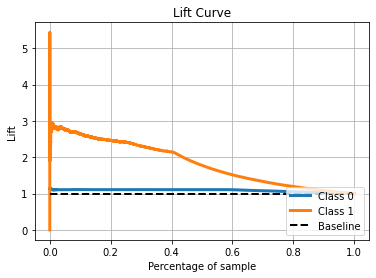

In [44]:
#Scikitplot library is there to help
skplt.metrics.plot_lift_curve( y_val, yhat_knn );

## 7.2. Logistic Regressor

In [45]:
# model definition
lr_model = lm.LogisticRegression( random_state=42 ) 

# model training
lr_model.fit( x_train, y_train )

# model prediction
yhat_lr = lr_model.predict_proba( x_val )

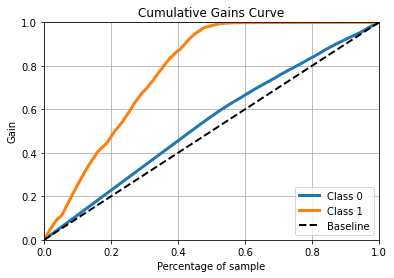

In [46]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr );

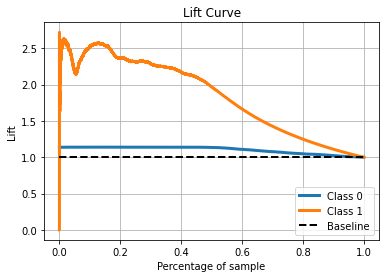

In [47]:
#Scikitplot library is there to help
skplt.metrics.plot_lift_curve( y_val, yhat_lr );

## 7.3 Extra Trees Classifier

In [62]:
 # model definition
#et = en.ExtraTreesClassifier( n_estimators=1000, n_jobs=-1, random_state=42 ) 

# model training
#et.fit( x_train, y_train )

# model prediction
#yhat_et = et.predict_proba( x_val )

In [ ]:
 # Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_et );

In [ ]:
#Scikitplot library is there to help
skplt.metrics.plot_lift_curve( y_val, yhat_et );

##  7.4. Random Forest

In [65]:
# model definition
rf = en.RandomForestClassifier( n_estimators=1000, n_jobs=-1, random_state=42 )

# model training
rf.fit( x_train, y_train )

# model prediction
yhat_rf = rf.predict_proba( x_val )

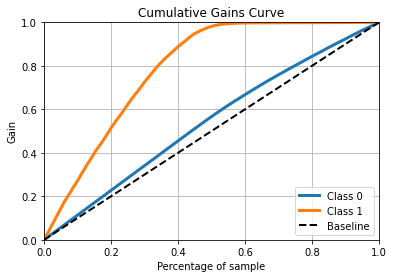

In [66]:
#Accumulative gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_rf );

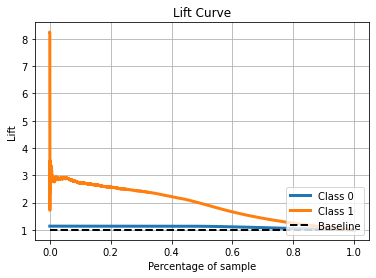

In [67]:
# scikitplot libary is there to help
skplt.metrics.plot_lift_curve( y_val, yhat_rf );

# 8.0. Model Performance

In [68]:
def precision_at_k( data, k=10 ):
    data = data.reset_index( drop=True )
    data['ranking'] = data.index + 1
    
    data['precision_at_k'] = data['response'].cumsum() / data['ranking']
    
    return ( data.loc[ k, 'precision_at_k'], data )

In [69]:
def recall_at_k( data, k=15 ):
    data = data.reset_index( drop=True )
    data['ranking'] = data.index + 1
    
    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()
    
    return ( data.loc[ k, 'recall_at_k'], data )

# 9.0. Deploy to Production

In [47]:
# Save trained model
pickle.dump( lr_model, open( '/home/cassiano/repos/health_insurance_cross_sell/src/models/model_linear_regression.pkl', 'wb' ) )

## 9.1. Health Insurance Class

In [100]:
import pickle
import numpy  as np
import pandas as pd

class HealthInsurance( object ):
    
    def __init__( self ):
        self.home_path = '/home/cassiano/repos/health_insurance_cross_sell/'
        self.annual_premium_scaler =            pickle.load( open( self.home_path + 'src/features/annual_premium_scaler.pkl', 'rb' ) )
        self.age_scaler =                       pickle.load( open( self.home_path + 'src/features/age_scaler.pkl', 'rb' ) ) 
        self.vintage_scaler =                   pickle.load( open( self.home_path + 'src/features/vintage_scaler.pkl', 'rb' ) ) 
        self.target_encode_gender_scaler =      pickle.load( open( self.home_path + 'src/features/target_encode_gender_scaler.pkl', 'rb' ) )
        self.target_encode_region_code_scaler = pickle.load( open( self.home_path + 'src/features/target_encode_region_code_scaler.pkl', 'rb' ) )
        self.fe_policy_sales_channel_scaler =   pickle.load( open( self.home_path + 'src/features/fe_policy_sales_channel_scaler.pkl', 'rb' ) )
        
    def data_cleaning( self, df1 ):
        # 1.1. Rename Columns
        cols_new = ['id', 'gender', 'age', 'driving_license', 'region_code', 'previously_insured', 'vehicle_age', 
                    'vehicle_damage', 'annual_premium', 'policy_sales_channel', 'vintage']

        # rename 
        df1.columns = cols_new
        
        return df1 

    
    def feature_engineering( self, df2 ):
        # 2.0. Feature Engineering

        # Vehicle Damage Number
        df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x == 'Yes' else 0 )

        # Vehicle Age
        df2['vehicle_age'] =  df2['vehicle_age'].apply( lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' if x == '1-2 Year' else 'below_1_year' )
        
        return df2
    
    
    def data_preparation( self, df5 ):
        # anual premium - StandarScaler
        df5['annual_premium'] = self.annual_premium_scaler.transform( df5[['annual_premium']].values )

        # Age - MinMaxScaler
        df5['age'] = self.age_scaler.transform( df5[['age']].values )

        # Vintage - MinMaxScaler
        df5['vintage'] = self.vintage_scaler.transform( df5[['vintage']].values )

        # gender - One Hot Encoding / Target Encoding
        df5.loc[:, 'gender'] = df5['gender'].map( self.target_encode_gender_scaler )

        # region_code - Target Encoding / Frequency Encoding
        df5.loc[:, 'region_code'] = df5['region_code'].map( self.target_encode_region_code_scaler )

        # vehicle_age - One Hot Encoding / Frequency Encoding
        df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

        # policy_sales_channel - Target Encoding / Frequency Encoding
        df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( self.fe_policy_sales_channel_scaler )
        
        # Feature Selection
        cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured',
                         'policy_sales_channel']
        
        return df5[ cols_selected ]
    
    
    def get_prediction( self, model, original_data, test_data ):
        # model prediction
        pred = model.predict_proba( test_data )

        # join prediction into original data
        original_data['score'] = pred[:, 1].tolist()
        
        return original_data.to_json( orient='records', date_format='iso' )

## 9.2. API Handler

In [101]:
import pickle
import pandas as pd
from flask import Flask, request, Response
from healthinsurance.HealthInsurance import HealthInsurance

# loading model
path = '/home/cassiano/repos/health_insurance_cross_sell/'
model = pickle.load( open( path + 'src/models/model_linear_regression.pkl', 'rb' ) )

# initialize API
app = Flask( __name__ )

@app.route( '/predict', methods=['POST'] )
def healthinsurance_predict():
    test_json = request.get_json()

    if test_json: # there is data
        if isinstance( test_json, dict ): # unique example
            test_raw = pd.DataFrame( test_json, index=[0] )
            
        else: # multiple example
            test_raw = pd.DataFrame( test_json, columns=test_json[0].keys() )
            
        # Instantiate Rossmann class
        pipeline = HealthInsurance()
        
        # data cleaning
        df1 = pipeline.data_cleaning( test_raw )
        
        # feature engineering
        df2 = pipeline.feature_engineering( df1 )
        
        # data preparation
        df3 = pipeline.data_preparation( df2 )
        
        # prediction
        df_response = pipeline.get_prediction( model, test_raw, df3 )
        
        return df_response
    
    else:
        return Response( '{}', status=200, mimetype='application/json' )
    
if __name__ == '__main__':
    app.run( '0.0.0.0', debug=True )

ModuleNotFoundError: No module named 'healthinsurance'

## 9.3. API Tester

In [141]:
import requests

In [2]:
df_test  = pd.read_csv( '../data/raw/test.csv')

In [3]:
print( f'Number of Rows: {df_test.shape[0]}' )
print( f'Number of Columns: {df_test.shape[1]}' )

Number of Rows: 127037
Number of Columns: 11


In [145]:
 df_test = df_test.sample(10)

In [146]:
 df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
21277,402387,Female,58,1,37.0,0,1-2 Year,Yes,52175.0,26.0,223
89250,470360,Female,59,1,28.0,0,1-2 Year,Yes,68125.0,26.0,267
61653,442763,Male,20,1,36.0,1,< 1 Year,No,37126.0,160.0,59
109733,490843,Female,22,1,9.0,1,< 1 Year,No,35818.0,152.0,253
9641,390751,Female,79,1,28.0,0,> 2 Years,Yes,48065.0,26.0,293
15981,397091,Male,27,1,13.0,1,< 1 Year,No,26198.0,152.0,265
45502,426612,Female,70,1,28.0,1,1-2 Year,No,38922.0,26.0,283
917,382027,Female,24,1,33.0,1,< 1 Year,No,30630.0,152.0,255
61809,442919,Female,32,1,8.0,0,1-2 Year,Yes,2630.0,156.0,72
36375,417485,Female,26,1,16.0,1,< 1 Year,No,2630.0,152.0,39


In [147]:
# convert dataframe to json
data = json.dumps( df_test.to_dict( orient='records' ) )

In [148]:
data

'[{"id": 402387, "Gender": "Female", "Age": 58, "Driving_License": 1, "Region_Code": 37.0, "Previously_Insured": 0, "Vehicle_Age": "1-2 Year", "Vehicle_Damage": "Yes", "Annual_Premium": 52175.0, "Policy_Sales_Channel": 26.0, "Vintage": 223}, {"id": 470360, "Gender": "Female", "Age": 59, "Driving_License": 1, "Region_Code": 28.0, "Previously_Insured": 0, "Vehicle_Age": "1-2 Year", "Vehicle_Damage": "Yes", "Annual_Premium": 68125.0, "Policy_Sales_Channel": 26.0, "Vintage": 267}, {"id": 442763, "Gender": "Male", "Age": 20, "Driving_License": 1, "Region_Code": 36.0, "Previously_Insured": 1, "Vehicle_Age": "< 1 Year", "Vehicle_Damage": "No", "Annual_Premium": 37126.0, "Policy_Sales_Channel": 160.0, "Vintage": 59}, {"id": 490843, "Gender": "Female", "Age": 22, "Driving_License": 1, "Region_Code": 9.0, "Previously_Insured": 1, "Vehicle_Age": "< 1 Year", "Vehicle_Damage": "No", "Annual_Premium": 35818.0, "Policy_Sales_Channel": 152.0, "Vintage": 253}, {"id": 390751, "Gender": "Female", "Age": 

In [152]:
# API Call
#url = 'http://0.0.0.0:5000/predict'
url = 'https://health-insurance-score.herokuapp.com/predict'
header = {'Content-type': 'application/json' }

r = requests.post( url, data=data, headers=header )
print( 'Status Code {}'.format( r.status_code ) )

Status Code 200


In [153]:
d1 = pd.DataFrame( r.json(), columns=r.json()[0].keys() )
d1.sort_values( 'score', ascending=False ).head(20)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,score
1,470360,0.103518,0.600000,1,0.187178,0,between_1_2_year,1,2.185754,26.0,0.889273,0.285326
4,390751,0.103518,0.907692,1,0.187178,0,over_2_years,1,1.018464,26.0,0.979239,0.273376
8,442919,0.103518,0.184615,1,0.096219,0,between_1_2_year,1,-1.625396,156.0,0.214533,0.243598
0,402387,0.103518,0.584615,1,0.079402,0,between_1_2_year,1,1.257625,26.0,0.737024,0.195093
6,426612,0.103518,0.769231,1,0.187178,1,between_1_2_year,0,0.486433,26.0,0.944637,0.000830
2,442763,0.138736,0.000000,1,0.080414,1,below_1_year,0,0.381924,160.0,0.169550,0.000659
7,382027,0.103518,0.061538,1,0.100213,1,below_1_year,0,0.003922,152.0,0.847751,0.000555
5,397091,0.138736,0.107692,1,0.090455,1,below_1_year,0,-0.253975,152.0,0.882353,0.000525
3,490843,0.103518,0.030769,1,0.082080,1,below_1_year,0,0.305812,152.0,0.840830,0.000514
9,417485,0.103518,0.092308,1,0.068773,1,below_1_year,0,-1.625396,152.0,0.100346,0.000475


# 10.0. Google Sheets App - Script

In [ ]:
function onOpen(){
  var ui = SpreadsheetApp.getUi();
  ui.createMenu( 'Health Insurance Prediction' )
    .addItem( 'Get Prediction', 'PredictAll')
    .addToUi(); 
}

host_production = 'health-insurance-score.herokuapp.com'

// Help fuction
function ApiCall( data, endpoint ){
  var url = 'https://' + host_production + endpoint;
  var payload = JSON.stringify( data );

  var options = {'method': 'POST', 'contentType': 'application/json', 'payload': payload};

  var response = UrlFetchApp.fetch( url, options );

  //get response
  var rc = response.getResponseCode();
  var responseText = response.getContentText();

  if ( rc !== 200){
    Logger.log( 'Response (%s) %s', rc, responseText);
  }

  else{
    prediction = JSON.parse( responseText );
  }

  return prediction


};

function PredictAll(){
  var ss = SpreadsheetApp.getActiveSheet();
  var titleColumns = ss.getRange( 'A1:k1').getValues()[0];
  var lastRow = ss.getLastRow();

  var data = ss.getRange( 'A2' + ':' + 'K' + lastRow ).getValues();

  // run over all rows
  for ( row in data ){
    var json = new Object();


     // run over all columns
     for( var j=0; j < titleColumns.length; j++ ){
       json[titleColumns[j]] = data[row][j];
     };

    // List of Json to Send
    var json_send = new Object();
    json_send['id'] = json['id']
    json_send['gender'] = json['gender']
    json_send['age'] = json['age']
    json_send['driving_license'] = json['driving_license']
    json_send['region_code'] = json['region_code']
    json_send['previously_insured'] = json['previously_insured']
    json_send['vehicle_age'] = json['vehicle_age']
    json_send['vehicle_damage'] = json['vehicle_damage']
    json_send['annual_premium'] = json['annual_premium']
    json_send['policy_sales_channel'] = json['policy_sales_channel']
    json_send['vintage'] = json['vintage']

    pred = ApiCall( json_send, '/predict');


    // Send back to google sheets
    ss.getRange( Number( row ) + 2, 12 ).setValue( pred[0]['score'])

  };
};
